In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from keras.utils.np_utils import normalize
from PIL import Image
import numpy as np
from patchify import patchify, unpatchify


In [2]:
os.chdir('E:\\PlotDel_Steven\\sen_proj')
from fpackage.resnet50_unet import DataGen, build_resnet50_unet

In [3]:
data_dir= "../"
dataset_path = data_dir + "Data/dataset"

In [4]:
input_shape = (512, 512, 3)
model = build_resnet50_unet(input_shape)
model.load_weights(dataset_path + "/ResNet_UNet.h5")
#model.summary()

In [5]:
import matplotlib.pyplot as plt

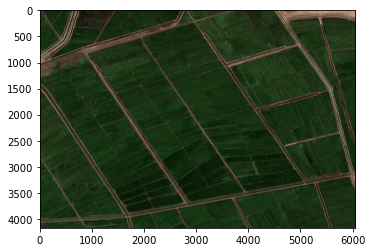

In [6]:
#Apply a trained model on large image
test_image = cv2.imread(r"E:\PlotDel_Steven\Data\subimages1\tile_7.tif") #BGR
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
#test_image = cv2.resize(test_image, (12288, 12288))

#This will split the image into small images of shape [3,3]
patches = patchify(test_image, (512,512, 3), step=512)  #Step=512 for 512 patches means no overlap
plt.imshow(test_image)

In [7]:
i=0
j=0
single_patch = patches[i, j, 0, :, :, :]       
single_patch = np.expand_dims(single_patch, axis=0) #very important
single_patch = single_patch/255.0
result = (model.predict(single_patch))
#result

In [8]:
predicted_patches = []
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        #print(i,j)
        
        single_patch = patches[i, j, 0, :, :, :]       
        single_patch = np.expand_dims(single_patch, axis=0) #very important
        single_patch = single_patch/255.0
        result = (model.predict(single_patch))#astype(np.uint8)
        result = result > 0.015
        result = np.reshape(result*255, (512, 512))
        #single_patch_predicted_img = np.argmax(result, axis=3)[0,:,:]

        predicted_patches.append(result)

predicted_patches = np.array(predicted_patches)
#predicted_patches,01999123,078123

In [9]:
patches.shape,single_patch.shape,predicted_patches.shape

((8, 11, 1, 512, 512, 3), (1, 512, 512, 3), (88, 512, 512))

In [10]:
predicted_patches1 = np.array(predicted_patches)
predicted_patches1.shape

(88, 512, 512)

In [11]:

predicted_patches1 = np.array(predicted_patches)
predicted_patches_reshaped = np.reshape(predicted_patches1, (patches.shape[0], 
                                                            patches.shape[1],
                                                            patches.shape[2], 
                                                            512,512
                                                            ))
#predicted_patches_reshaped = np.expand_dims(predicted_patches_reshaped, axis=5) #introduce channel

predicted_patches_reshaped = np.stack((predicted_patches_reshaped,)*3, axis=-1).astype(np.uint8)

#reconstructed_image = unpatchify(predicted_patches_reshaped, test_image.shape)
#lt.imshow(reconstructed_image, cmap='gray')
#plt.imsave('data/results/segm.jpg', reconstructed_image, cmap='gray')
(patches.shape),predicted_patches_reshaped.shape


((8, 11, 1, 512, 512, 3), (8, 11, 1, 512, 512, 3))

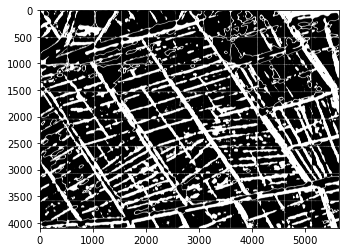

In [12]:
predicted_patches_reshaped.shape[0],predicted_patches_reshaped.shape[1]
#get the correct shape
p = predicted_patches_reshaped.shape[0]*512,predicted_patches_reshaped.shape[1]*512
#predicted_patches_reshaped = unpatchify(predicted_patches_reshaped, test_image.shape)
reconstructed_image = unpatchify(predicted_patches_reshaped,cv2.resize(test_image, (int(p[1]),int(p[0]))).shape)
plt.imshow(reconstructed_image, cmap='gray')
plt.show()

In [41]:
reconstructed_image.shape

(4096, 5632, 3)

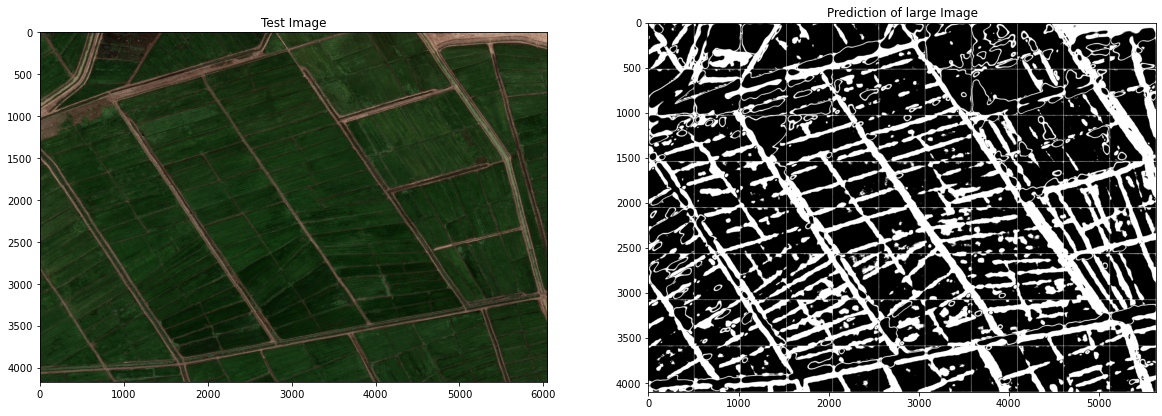

In [13]:
#plt.hist(reconstructed_image.flatten())  #Threshold everything above 0

# final_prediction = (reconstructed_image > 0.01).astype(np.uint8)
# plt.imshow(final_prediction)

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.title('Test Image')
plt.imshow(test_image, cmap='gray')
plt.subplot(222)
plt.title('Prediction of large Image')
plt.imshow(reconstructed_image, cmap='jet')
plt.show()

In [40]:
plt.imsave('tile_7_prediction.png', reconstructed_image, cmap='gray')